[Reference](https://pub.towardsai.net/scaling-vs-normalizing-data-5c3514887a84)

# 1. Simple Feature Scaling:

In [1]:
def simple_feature_scaling(arr):
    """This method applies simple-feature-scaling
        to a distribution (arr).
    @param arr: An array or list or series object
    @return: The arr with all features simply scaled
    """

    arr_max = max(arr)
    new_arr = [i/arr_max for i in arr]

    return new_arr
  
# Let's define an array arr
  
arr = list(range(1,11))
arr_scaled = simple_feature_scaling(arr)

print(f'Before Scaling...\n min arr is {min(arr)}\n max arr is {max(arr)}\n')
print(f'After Scaling...\n min arr_scaled is {min(arr_scaled)}\n max arr_scaled is {max(arr_scaled)}')

Before Scaling...
 min arr is 1
 max arr is 10

After Scaling...
 min arr_scaled is 0.1
 max arr_scaled is 1.0


# 2. Min-Max Scaling:

In [2]:
def min_max_scaling(arr):
    """This method applies min-max-scaling
        to a distribution (arr).
    @param arr: An array or list or series object
    @return: The arr with all features min-max scaled
    """

    arr_max = max(arr)
    arr_min = min(arr)
    range_ = arr_max - arr_min

    new_arr = [(i-arr_min)/range_ for i in arr]

    return new_arr
  
  # Let's define an arr and call the min-max scaler
  
arr = list(range(1,11))
arr_scaled = min_max_scaling(arr)

print(f'Before Scaling...\n min arr is {min(arr)}\n max arr is {max(arr)}\n')
print(f'After Scaling...\n min arr_scaled is {min(arr_scaled)}\n max arr_scaled is {max(arr_scaled)}')

Before Scaling...
 min arr is 1
 max arr is 10

After Scaling...
 min arr_scaled is 0.0
 max arr_scaled is 1.0


# Apply Scaling to a Distribution

In [3]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# I define additional NAN values for pandas to check for
additional_nan_values = ['n/a', '--','?','None','Non','non','none']

# Save the data link
data = 'https://github.com/Lawrence-Krukrubo/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true'

# Read in the data
loan_df = pd.read_excel(data, header=2, na_values=additional_nan_values)
loan_df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,1


/usr/local/lib/python3.7/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


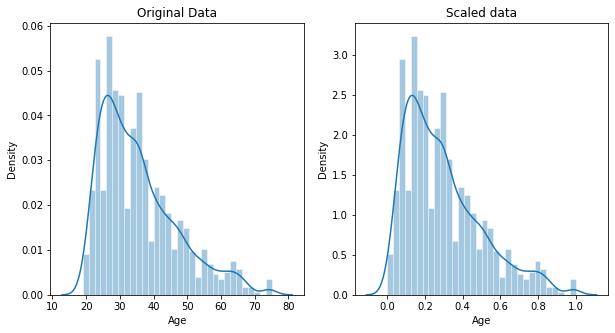

In [4]:
# let's scale the data
original_data = loan_df.Age
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.set_style('ticks')
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
ax[1].set_xlabel('Age')
plt.show()

In [5]:
def z_score_norm(arr):
    """Apply z-score normalization
        to an array or series
    """
    mean_ = np.mean(arr)
    std_ = np.std(arr)

    new_arr = [(i-mean_)/std_ for i in arr]

    return new_arr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


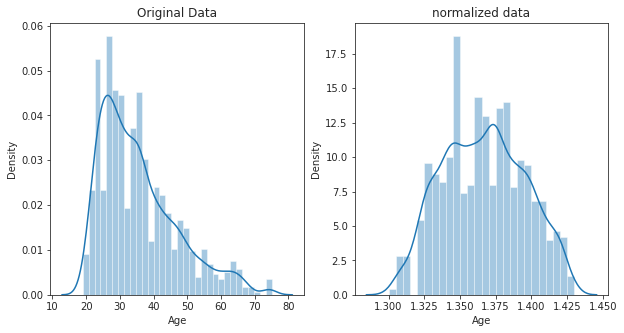

In [6]:
from scipy import stats

# let's normalize the data
original_data = loan_df.Age
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.set_style('ticks')
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("normalized data")
ax[1].set_xlabel('Age')
plt.show()